# Crude Death Date from maternal conditions, per 100,000 females, for the continent of South America in the years 1970, 1979, 1986, 2011 and 2017

In [1]:
# Import necessary modules 
import numpy as np
import pandas as pd
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt

## Show list containing South American countries classed by Our World in Data

In [2]:
# Load Our World in Data csv file and visualise it
df_continent_class = pd.read_csv("data/continents-according-to-our-world-in-data.csv")
# display(df_continent_class)
# print(df_continent_class["Continent"].unique())

# List of South American countries according to Our World in Data
sa_countries = df_continent_class[df_continent_class["Continent"]=="South America"]["Entity"]
sa_countries_list = list(sa_countries)
print("South America according to Our World in Data: \n", sa_countries_list)

# List of South American countries according the UN 
# Could have loaded this from the file but would need to arrange the columns to be readable. This is quicker for a small dataset. 
un_sa_countries_list = ["Argentina", "Bolivia (Plurinational State of)", "Brazil", "Chile", "Colombia", "Ecuador", "Falkland Islands (Malvinas)",
"French Guiana", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela (Bolivarian Republic of)"]
print("\n South America according to the UN: \n",un_sa_countries_list)

South America according to Our World in Data: 
 ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'South Georgia and the South Sandwich Islands', 'Suriname', 'Uruguay', 'Venezuela']

 South America according to the UN: 
 ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands (Malvinas)', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela (Bolivarian Republic of)']


These are the same apart from some name changes and the UN does not include the South Georgia and the South Sandwich Islands in its list of countries (anywhere). Therefore, we will use the UN's list of countries in South America since that will help keep the same name formatting between tables.

## Show populations of South America at each year

In [3]:
years = [1970, 1979, 1986, 2011, 2017]

# Load the UN dataset
un_dataset = pd.read_csv("data/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.csv",
                                       low_memory=False)
# display(un_dataset)

# Initiate dictionary of the female population of the South America at each year
south_america_female_populations = {}

# Loop through each year and fill the dictionary with the year and population of South America in that year
for i in years:
    string = un_dataset.loc[(un_dataset['Region, subregion, country or area *'] == "South America") \
    & (un_dataset['Year'] == i)]["Female Population, as of 1 July (thousands)"]
    string.values[0] = string.values[0].replace(" ", "")
    south_america_female_populations[i] = int(string.values[0])*1000

# Show results
print("Female population of South America:")
display(south_america_female_populations)

Female population of South America:


{1970: 96582000,
 1979: 118634000,
 1986: 138041000,
 2011: 200669000,
 2017: 213020000}

## Load data for maternal deaths for the whole world at different years
(Only saw later that I could have downloaded all of these together from another tab which would have been much easier)

In [4]:
crude_maternal_deaths_1970 = pd.read_csv("data/1970_crude_maternal_deaths.csv")
crude_maternal_deaths_1979 = pd.read_csv("data/1979_crude_maternal_deaths.csv")
crude_maternal_deaths_1986 = pd.read_csv("data/1986_crude_maternal_deaths.csv")
crude_maternal_deaths_2011 = pd.read_csv("data/2011_crude_maternal_deaths.csv")
crude_maternal_deaths_2017 = pd.read_csv("data/2017_crude_maternal_deaths.csv")
# display(crude_maternal_deaths_2011)

In [22]:
# This function returns (for a given year) the total maternal deaths in South America, the female population of the represented data in
# South America, the crude death rate from maternal conditions, the total female population in South America and the proportion of
# the population that the represented data forms. 

def crude_maternal_deaths_sa(year):
    # Show maternal deaths per country for data in given year
    sa_crude_maternal_deaths = getattr(sys.modules[__name__], f"crude_maternal_deaths_{year}")
    sa_crude_maternal_deaths = sa_crude_maternal_deaths\
    [sa_crude_maternal_deaths["Country Name"].isin(un_sa_countries_list)][["Country Name", "Number"]]
    sa_crude_maternal_deaths.rename(columns={"Number": "Number of Maternal deaths"}, inplace=True)
    # display(sa_crude_maternal_deaths)

    # Total maternal deaths in South America in that year
    total_maternal_deaths_sa = sum(sa_crude_maternal_deaths["Number of Maternal deaths"])

    # Show countries represented in that year
    country_list = list(sa_crude_maternal_deaths["Country Name"])

    # Add the population of each country represented in South America for that year from the UN dataset
    represented_country_dict = {}
    for country in country_list:
        string  = un_dataset.loc[(un_dataset['Region, subregion, country or area *'] == f"{country}") & (un_dataset['Year'] == year)]["Female Population, as of 1 July (thousands)"] 
        string.values[0] = string.values[0].replace(" ", "")
        represented_country_dict[country] = int(string.values[0])*1000
    sa_crude_maternal_deaths["Population of females"] = represented_country_dict.values()

    represented_female_sa_population = sum(represented_country_dict.values())

    #Total female population in South America
    print(f"The year is {year}",
    f"\nTotal maternal deaths in South America is {total_maternal_deaths_sa:,d}",  
    f"\nFemale population of represented data is {represented_female_sa_population:,d}",
    f"\nCrude death rate from maternal conditions per 100,000 females is {round((total_maternal_deaths_sa/represented_female_sa_population)*100000,2)}",
    f"\nTotal female population in South America is {south_america_female_populations[year]:,d}",
    f"\nProportion of female population represented by data is { round(represented_female_sa_population/south_america_female_populations[year]*100, 2)}%")
    display(sa_crude_maternal_deaths)

crude_maternal_deaths_sa(1979)

The year is 1979 
Total maternal deaths in South America is 4,063 
Female population of represented data is 91,539,000 
Crude death rate from maternal conditions per 100,000 females is 4.44 
Total female population in South America is 118,634,000 
Proportion of female population represented by data is 77.16%


,Country Name,Number of Maternal deaths,Population of females
0,Argentina,548,13992000
7,Brazil,2609,59951000
10,Chile,176,5669000
16,Ecuador,424,3949000
20,French Guiana,0,31000
23,Guyana,8,390000
47,Suriname,6,188000
54,Venezuela (Bolivarian Republic of),292,7369000


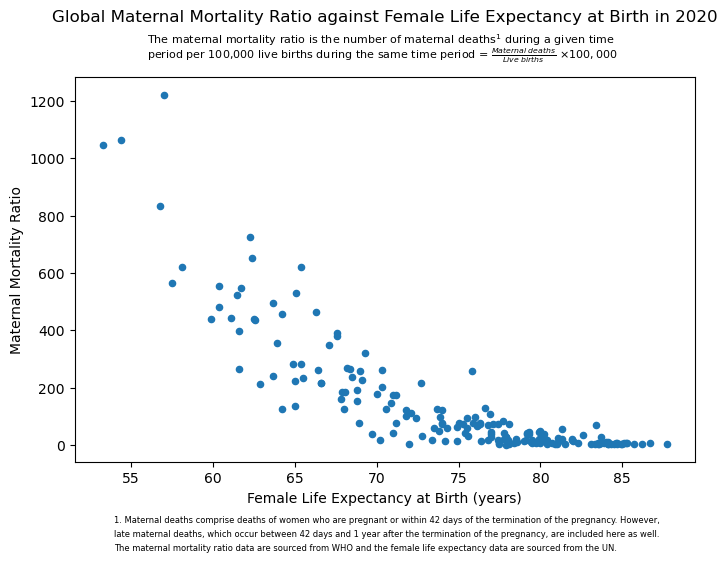

In [6]:
# Load the maternal mortality ratio data
maternal_mortality_ratio = pd.read_csv("data/maternal_mortality_ratio.csv",
                                      low_memory=False)
# Sort for countries and the year 2020
maternal_mortality_ratio = maternal_mortality_ratio.loc[(maternal_mortality_ratio["DIM_TIME"] == 2020)][["GEO_NAME_SHORT", "VALUE_NUMERIC"]]
life_expectancy = un_dataset.loc[(un_dataset["Type"] == "Country/Area") & (un_dataset["Year"] == 2020)][["Region, subregion, country or area *", "Female Life Expectancy at Birth (years)"]]
maternal_mortality_ratio.rename(columns={"GEO_NAME_SHORT":"Region, subregion, country or area *",
                                        "VALUE_NUMERIC":"Maternal Mortality Ratio"}, inplace=True)
# display(life_expectancy)
# display(maternal_mortality_ratio)

# Merge the dataframes on the countries
merged_df = pd.merge(maternal_mortality_ratio, life_expectancy, on='Region, subregion, country or area *')
merged_df["Female Life Expectancy at Birth (years)"] = merged_df["Female Life Expectancy at Birth (years)"].astype(float)
merged_df["Maternal Mortality Ratio"] = merged_df["Maternal Mortality Ratio"].astype(float)
# display(merged_df)

# Plot the relationship
ax = merged_df.plot.scatter(x = 'Female Life Expectancy at Birth (years)', y = 'Maternal Mortality Ratio',
                           figsize=(8,5));
ax.set_title(r"Global Maternal Mortality Ratio against Female Life Expectancy at Birth in 2020", pad = 40)
ax.text(56, 1400, r"The maternal mortality ratio is the number of maternal deaths${^1}$ during a given time", fontsize=8)
ax.text(56, 1350,r"period per 100,000 live births during the same time period = $\frac{Maternal \; deaths}{Live \; births}$ $\times{100,000}$", fontsize=8)
ax.text(54, -270, r"1. Maternal deaths comprise deaths of women who are pregnant or within 42 days of the termination of the pregnancy. However,", fontsize=6)
ax.text(54, -320,r"late maternal deaths, which occur between 42 days and 1 year after the termination of the pregnancy, are included here as well.", fontsize=6)
ax.text(54, -370,r"The maternal mortality ratio data are sourced from WHO and the female life expectancy data are sourced from the UN.", fontsize=6)
plt.savefig('data/maternal_mortality_vs_female_life_expectancy.png', dpi=300, bbox_inches="tight")